# Topic Modeling — CSV Files

In these lessons, we're learning about a text analysis method called *topic modeling*. This method will help us identify the main topics or discourses within a collection of texts a single text that has been separated into smaller text chunks.

---

## Dataset

### Am I the Asshole?

<blockquote class="epigraph" style=" padding: 10px">

AITA for lying about my biggest fear on a quiz show and subsequently winning a car and making other contestants lose?


<p class ="attribution">
    —Reddit user iwonacar, <a href="https://www.reddit.com/r/AmItheAsshole/comments/dmfsum/aita_for_lying_about_my_biggest_fear_on_a_quiz/">r/AmItheAsshole</a>
    </p>
    
</blockquote>

In this particular lesson, we're going to use [Little MALLET Wrapper](https://github.com/maria-antoniak/little-mallet-wrapper), a Python wrapper for [MALLET](http://mallet.cs.umass.edu/topics.php), to topic model a CSV file with 2,932 Reddit posts from the subreddit [r/AmITheAsshole](https://www.reddit.com/r/AmItheAsshole/) that have at least an upvote score of 2,000. This is an online forum where people share their personal conflicts and ask the community to judge who's the a**hole in the story. This data was collected with PSAW, a wrapper for the Pushshift API.

___

<div class="admonition attention" name="html-admonition" style="background: lightyellow;padding: 10px">  
<p class="title">Attention</p>  
    
<p>If you're working in this Jupyter notebook on your own computer, you'll need to have both the Java Development Kit and MALLET pre-installed. For set up instructions, please see <a href="http://melaniewalsh.github.io/Intro-Cultural-Analytics/Text-Analysis/Topic-Modeling-Set-Up.html">the previous lesson<a/>.  </p>
    
If you're working in this Jupyter notebook in the cloud via Binder, then the Java Development Kit and Mallet will already be installed. You're good to go!  
     
</div>  

## Set MALLET Path

Since Little MALLET Wrapper is a Python package built around MALLET, we first need to tell it where the bigger, Java-based MALLET lives.

We're going to make a variable called `path_to_mallet` and assign it the file path of our MALLET program. We need to point it, specifically, to the "mallet" file inside the "bin" folder inside the "mallet-2.0.8" folder. 

In [1]:
path_to_mallet = 'mallet-2.0.8/bin/mallet'

If MALLET is located in another directory, then set your `path_to_mallet` to that file path.

## Install Packages

In [2]:
#!pip install little_mallet_wrapper
#!pip install seaborn
#To install the most updated version of little_mallet_wrapper:
#!!pip install git+https://github.com/maria-antoniak/little-mallet-wrapper.git

## Import Packages

Now let's `import` the `little_mallet_wrapper` and the data viz library `seaborn`.

In [11]:
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100

We're also going to import [`glob`](https://docs.python.org/3/library/glob.html) and [`pathlib`](https://docs.python.org/3/library/pathlib.html#basic-use) for working with files and the file system, as well as pandas for working with the CSV data.

## Get Training Data From CSV File

<div class="admonition note" name="html-admonition" style="background: lightblue; padding: 10px">
<p class="title">Note</p>   
We're calling these text files our *training data*, because we're *training* our topic model with these texts. The topic model will be learning and extracting topics based on these texts.
    
</div>

<div class="admonition pandasreview" name="html-admonition" style="background: black; color: white; padding: 10px">
<p class="title">Pandas</p>
 Do you need a refresher or introduction to the Python data analysis library Pandas? Be sure to check out <a href="https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Analysis/Pandas-Basics-Part1.html"> Pandas Basics (1-3) </a> in this textbook!
    
</div>

In [12]:
reddit_df = pd.read_csv("../data/top-reddit-aita-posts.csv")

In [13]:
reddit_df.head()

,author,full_date,date,title,selftext,url,subreddit,upvote_score,num_comments,num_crossposts
0,Additional-Pizza-805,2020-07-24 19:13:49+00:00,2020-07-24,AITA for kicking my cousin off of my sister’s wedding Zoom call?,My [27M] older sister [30F] and her fiancé [31M] were planning for over a year for their wedding...,https://www.reddit.com/r/AmItheAsshole/comments/hx80wd/aita_for_kicking_my_cousin_off_of_my_sist...,AmItheAsshole,11159,2209,4
1,decadel8ter,2020-07-24 14:37:13+00:00,2020-07-24,AITA for resenting my family for something that happened over a decade ago?,when i was 15 i was in a car accident. i was riding my bike on new bike lanes that my city had i...,https://www.reddit.com/r/AmItheAsshole/comments/hx2vvl/aita_for_resenting_my_family_for_somethin...,AmItheAsshole,2541,1143,0
2,Snoo_66130,2020-07-24 12:35:35+00:00,2020-07-24,AITA for telling my step dad to stop trying to be my dad?,"I'm 35, and my mom who is 52 is dating a man who is is 27. This is fucking weird as hell and...",https://www.reddit.com/r/AmItheAsshole/comments/hx0zk7/aita_for_telling_my_step_dad_to_stop_tryi...,AmItheAsshole,2809,1253,1
3,ohnoihaveabluechair,2020-07-24 10:56:56+00:00,2020-07-24,AITA for confronting my SIL for wearing clothes that belonged to me?,"Some info: A few years ago, my family didn’t have a lot of spare money to buy a lot of things (l...",https://www.reddit.com/r/AmItheAsshole/comments/hwzpbu/aita_for_confronting_my_sil_for_wearing_c...,AmItheAsshole,7581,1550,1
4,FormalLettuce3,2020-07-24 10:52:08+00:00,2020-07-24,AITA for saying we'd only help with my ex's kid's party if we could tell people we're engaged?,"This guy, ""Jack"", and I were together for about a year, and within a couple weeks of ending it I...",https://www.reddit.com/r/AmItheAsshole/comments/hwzncq/aita_for_saying_wed_only_help_with_my_exs...,AmItheAsshole,2915,1214,0


In [14]:
reddit_df['selftext'] = reddit_df['selftext'].astype(str)

### Process Reddit Posts

`little_mallet_wrapper.process_string(text, numbers='remove')`

Next we're going to process our texts with the function `little_mallet_wrapper.process_string()`. This function will take every individual post, transform all the text to lowercase as well as remove stopwords, punctuation, and numbers, and then add the processed text to our master list `training_data`.

In [15]:
training_data = [little_mallet_wrapper.process_string(text, numbers='remove') for text in reddit_df['selftext']]

In [16]:
original_texts = [text for text in reddit_df['selftext']]

### Process Reddit Post Titles

We're also going to extract the file name for each Reddit post.

In [17]:
reddit_titles = [title for title in reddit_df['title']]

### Get Dataset Statistics

We can get training data summary statisitcs by using the funciton `little_mallet_wrapper.print_dataset_stats()`.

In [18]:
little_mallet_wrapper.print_dataset_stats(training_data)

Number of Documents: 2932
Mean Number of Words per Document: 147.3
Vocabulary Size: 19331


## Training the Topic Model

## Set Number of Topics

We need to make a variable `num_topics` and assign it the number of topics we want returned.

In [19]:
num_topics = 15

## Set Training Data

We already made a variable called `training_data`, which includes all of our processed Reddit post texts, so we can just set it equal to itself.

In [20]:
training_data = training_data

## Set Other MALLET File Paths

Then we're going to set a file path where we want all our MALLET topic modeling data to be dumped. I'm going to output everything onto my Desktop inside a folder called "topic-model-output" and a subfolder specific to the Reddit posts called "Reddit."

All the other necessary variables below `output_directory_path` will be automatically created inside this directory.

In [21]:
#Change to your desired output directory
output_directory_path = 'topic-model-output/reddit'

#No need to change anything below here
Path(f"{output_directory_path}").mkdir(parents=True, exist_ok=True)

path_to_training_data           = f"{output_directory_path}/training.txt"
path_to_formatted_training_data = f"{output_directory_path}/mallet.training"
path_to_model                   = f"{output_directory_path}/mallet.model.{str(num_topics)}"
path_to_topic_keys              = f"{output_directory_path}/mallet.topic_keys.{str(num_topics)}"
path_to_topic_distributions     = f"{output_directory_path}/mallet.topic_distributions.{str(num_topics)}"

### Train Topic Model

Then we're going to train our topic model with `little_mallet_wrapper.quick_train_topic_model()`. The topic model should take about 1-1.5 minutes to train and complete. If you want it, you can look at your Terminal or PowerShell and see what the model looks like as it's training.

In [22]:
little_mallet_wrapper.quick_train_topic_model(path_to_mallet,
                                             output_directory_path,
                                             num_topics,
                                             training_data)

Importing data...
Complete
Training topic model...
Complete


([['baby',
   'pregnant',
   'child',
   'husband',
   'pregnancy',
   'pain',
   'birth',
   'hospital',
   'doctor',
   'could',
   'sil',
   'think',
   'abortion',
   'would',
   'medical',
   'surgery',
   'help',
   'weeks',
   'control',
   'children'],
  ['table',
   'store',
   'manager',
   'drink',
   'order',
   'restaurant',
   'bar',
   'drinking',
   'drinks',
   'pay',
   'tip',
   'place',
   'wine',
   'people',
   'coffee',
   'bottle',
   'food',
   'alcohol',
   'beer',
   'ordered'],
  ['money',
   'pay',
   'buy',
   'would',
   'paying',
   'college',
   'job',
   'bought',
   'house',
   'gift',
   'paid',
   'car',
   'give',
   'afford',
   'since',
   'year',
   'got',
   'rent',
   'working',
   'much'],
  ['time',
   'get',
   'like',
   'want',
   'work',
   'one',
   'doesn',
   'would',
   'going',
   'take',
   'even',
   'home',
   'really',
   'think',
   'day',
   'every',
   'make',
   'feel',
   'something',
   'week'],
  ['sister',
   'mom',
   '

When the topic model finishes, it will output your results to your `output_directory_path`.

## Display Topics and Top Words

To examine the 15 topics that the topic model extracted from the Reddit posts, run the cell below. This code uses the `little_mallet_wrapper.load_topic_keys()` function to read and process the MALLET topic model output from your computer, specifically the file "mallet.topic_keys.15".

In [23]:
topics = little_mallet_wrapper.load_topic_keys(path_to_topic_keys)

for topic_number, topic in enumerate(topics):
    print(f"✨Topic {topic_number}✨\n\n{topic}\n")

✨Topic 0✨

['baby', 'pregnant', 'child', 'husband', 'pregnancy', 'pain', 'birth', 'hospital', 'doctor', 'could', 'sil', 'think', 'abortion', 'would', 'medical', 'surgery', 'help', 'weeks', 'control', 'children']

✨Topic 1✨

['table', 'store', 'manager', 'drink', 'order', 'restaurant', 'bar', 'drinking', 'drinks', 'pay', 'tip', 'place', 'wine', 'people', 'coffee', 'bottle', 'food', 'alcohol', 'beer', 'ordered']

✨Topic 2✨

['money', 'pay', 'buy', 'would', 'paying', 'college', 'job', 'bought', 'house', 'gift', 'paid', 'car', 'give', 'afford', 'since', 'year', 'got', 'rent', 'working', 'much']

✨Topic 3✨

['time', 'get', 'like', 'want', 'work', 'one', 'doesn', 'would', 'going', 'take', 'even', 'home', 'really', 'think', 'day', 'every', 'make', 'feel', 'something', 'week']

✨Topic 4✨

['sister', 'mom', 'dad', 'family', 'parents', 'brother', 'mother', 'cousin', 'aunt', 'year', 'father', 'also', 'house', 'siblings', 'older', 'nephew', 'always', 'close', 'birthday', 'years']

✨Topic 5✨

['sch

## Load Topic Distributions

MALLET also calculates the likely mixture of these topics for every single Reddit post in the corpus. This mixture is really a probability distribution, that is, the probability that each topic exists in the document. We can use these probability distributions to examine which of the above topics are strongly associated with which specific posts.

To get the topic distributions, we're going to use the `little_mallet_wrapper.load_topic_distributions()` function, which will read and process the MALLET topic model output, specifically the file "mallet.topic_distributions.15". 

In [24]:
topic_distributions = little_mallet_wrapper.load_topic_distributions(path_to_topic_distributions)

In [25]:
topic_distributions[0]

[0.011076196974682066,
 0.000564392649472897,
 0.0013542299952905628,
 0.1530219806345308,
 0.1521519084626053,
 0.000814322382504041,
 0.08234356736699737,
 0.006933273680468054,
 0.000988281118714402,
 0.33177055578329395,
 0.2551412694103212,
 0.0016105767704565042,
 0.0009311983390601434,
 0.0004891183939972939,
 0.000809128037605374]

It's a bit easier to understand if we pair these probabilities with the topics themselves. As you can see below, Topic 8 "'room', 'house', 'dog', 'door', 'sleep', 'bed'" has a relatively high probability of existing in the Reddit post "AITA for walking my cat on a trail frequented by dogs?" while Topic 10 "'wedding', 'dress', 'hair', 'wear', 'ring', 'married'" has a relatively low probability.

In [42]:
reddit_post_to_check = "AITA for walking my cat on a trail frequented by dogs?"

reddit_post_number = reddit_titles.index(reddit_post_to_check)

print(f"Topic Distributions for {reddit_titles[reddit_post_number]}\n")
for topic_number, (topic, topic_distribution) in enumerate(zip(topics, topic_distributions[reddit_post_number])):
    print(f"✨Topic {topic_number} {topic[:6]} ✨\nProbability: {round(topic_distribution, 3)}\n")

Topic Distributions for AITA for walking my cat on a trail frequented by dogs?

✨Topic 0 ['baby', 'pregnant', 'child', 'husband', 'pregnancy', 'pain'] ✨
Probability: 0.002

✨Topic 1 ['table', 'store', 'manager', 'drink', 'order', 'restaurant'] ✨
Probability: 0.002

✨Topic 2 ['money', 'pay', 'buy', 'would', 'paying', 'college'] ✨
Probability: 0.024

✨Topic 3 ['time', 'get', 'like', 'want', 'work', 'one'] ✨
Probability: 0.177

✨Topic 4 ['sister', 'mom', 'dad', 'family', 'parents', 'brother'] ✨
Probability: 0.024

✨Topic 5 ['school', 'work', 'office', 'class', 'name', 'people'] ✨
Probability: 0.003

✨Topic 6 ['years', 'told', 'would', 'never', 'wife', 'life'] ✨
Probability: 0.035

✨Topic 7 ['kids', 'daughter', 'son', 'husband', 'wife', 'old'] ✨
Probability: 0.006

✨Topic 8 ['room', 'house', 'dog', 'door', 'sleep', 'bed'] ✨
Probability: 0.509

✨Topic 9 ['said', 'told', 'didn', 'got', 'asked', 'like'] ✨
Probability: 0.091

✨Topic 10 ['wedding', 'dress', 'hair', 'wear', 'ring', 'married'] ✨


## Explore Heatmap of Topics and Texts

We can visualize and compare these topic probability distributions with a heatmap by using the `little_mallet_wrapper.plot_categories_by_topics_heatmap()` function.

We have everything we need for the heatmap except for our list of `target_labels`, the sample of texts that we'd like to visualize and compare with the heatmap. Below we make our list of desired target labels by randomly selecting 6 Reddit post titles.

In [27]:
target_labels = random.sample(reddit_titles, 6)

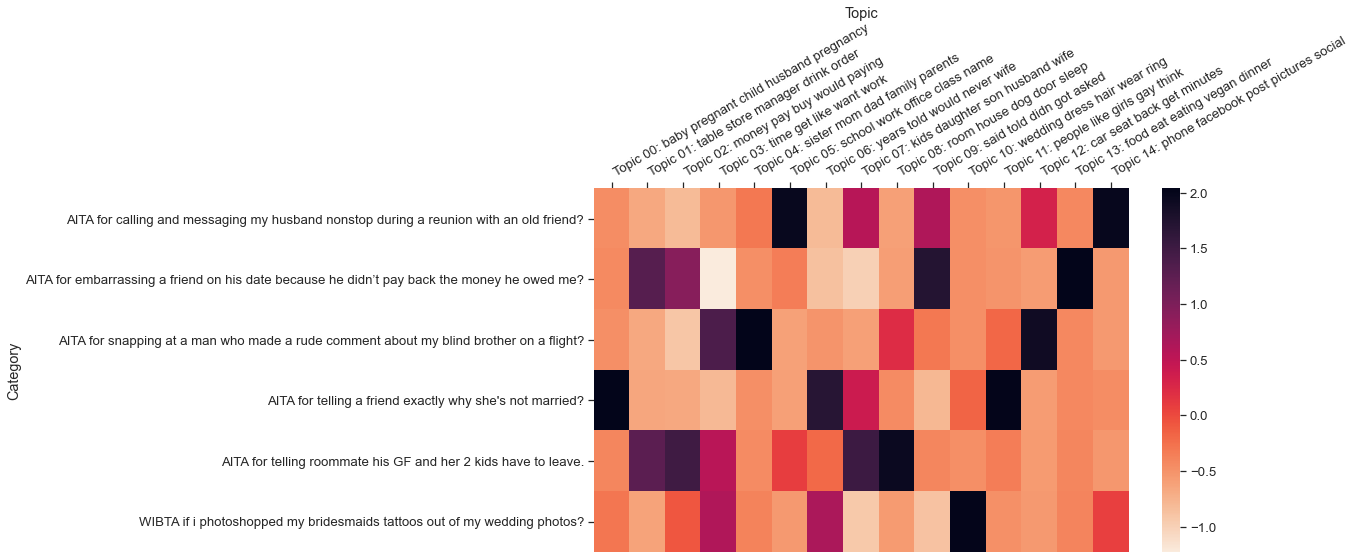

In [28]:
little_mallet_wrapper.plot_categories_by_topics_heatmap(reddit_titles,
                                      topic_distributions,
                                      topics, 
                                      output_directory_path + '/categories_by_topics.pdf',
                                      target_labels=target_labels,
                                      dim= (18, 8)
                                     )

The `plot_categories_by_topics_heatmap()` function also helpfully outputs a PDF of the heatmap to `output_directory_path + '/categories_by_topics.pdf'`. We can download this PDF and explore it in more detail or embed it in an article or blog post!

In [29]:
from IPython.display import IFrame
IFrame("topic-model-output/reddit/categories_by_topics.pdf", width=1000, height=600)

## Display Top Titles Per Topic

We can also display the Reddit posts and titles that have the highest probability for every topic with the `little_mallet_wrapper.get_top_docs()` function.

In [30]:
training_data_reddit_titles = dict(zip(training_data, reddit_titles))
training_data_original_text = dict(zip(training_data, original_texts))

We'll make our own function `display_top_titles_per_topic()` that will display the top Reddit post titles for every topic. This function accepts a given `topic_number` as well as a desired `number_of_documents` to display.

In [31]:
def display_top_titles_per_topic(topic_number=0, number_of_documents=5):
    
    print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        print(round(probability, 4), training_data_reddit_titles[document] + "\n")
    return

**Topic 0**

To display the top 5 Reddit post titles with the highest probability of containing Topic 0, we will run:

In [32]:
display_top_titles_per_topic(topic_number=0, number_of_documents=5)

✨Topic 0✨

['baby', 'pregnant', 'child', 'husband', 'pregnancy', 'pain', 'birth', 'hospital', 'doctor', 'could', 'sil', 'think', 'abortion', 'would', 'medical', 'surgery', 'help', 'weeks', 'control', 'children']

0.4107 AITA for offering my DNA because my brother won't do a paternity test

0.378 AITA for causing a scene in the hospital over an IV?

0.3728 AITA for lying about my birth control use?

0.363 AITA for asking my immediate family to get the flu shot if they want to see our newborn in the hospital

0.3542 AITA for feeling jealous that my sister is getting more attention for her illness than I am for mine?



**What would you label this topic?**

To display the top 5 Reddit post titles with the highest probability of containing Topic 9, we will run:

In [43]:
display_top_titles_per_topic(topic_number=10, number_of_documents=5)

✨Topic 10✨

['wedding', 'dress', 'hair', 'wear', 'ring', 'married', 'fiancé', 'party', 'wearing', 'one', 'would', 'think', 'tattoo', 'family', 'husband', 'getting', 'makeup', 'engaged', 'fiance', 'ceremony']

0.4522 AITA for showing up at my cousin's wedding in a hoodie and jean shorts?

0.438 AITA? I wore an accessory ring to work knowing that my co-worker has the same ring for her engagement ring.

0.4347 AITA for not including a bridesmaid in photographs because she wore a suit?

0.4049 AITA for dressing nicer than the couple getting married?

0.3982 AITA for getting a tattoo before my brother's wedding?



**What would you label this topic?**

To display the top 7 Reddit posts with the highest probability of containing Topic 8, we will run:

In [34]:
display_top_titles_per_topic(topic_number=8, number_of_documents=7)

✨Topic 8✨

['room', 'house', 'dog', 'door', 'sleep', 'bed', 'bathroom', 'apartment', 'roommate', 'living', 'live', 'cat', 'use', 'stuff', 'home', 'dogs', 'girlfriend', 'bedroom', 'moved', 'place']

0.5773 AITA for refusing to eat my GF cooking because her cats litter is disgusting?

0.5279 AITA for peeing in places that are not the toilet?

0.5087 AITA for walking my cat on a trail frequented by dogs?

0.5039 Aita for not wanting all 3 of my triplet children to have to share a room

0.4808 WIBTA if I told my roommate his girlfriend is getting too comfortable in our home?

0.4544 AITA for turning off the dryer on someone who removed my laundry before it was done?

0.4374 AITA for not allowing my roommate's girlfriend to use my bathroom causing her to piss herself



**What would you label this topic?**

## Display Topic Words in Context of Original Text

Often it's useful to actually look at the document that has ranked highly for a given topic and puzzle out why it ranks so highly.

To display the original Reddit post texts that rank highly for a given topic, with the relevant topic words **bolded** for emphasis, we are going to make the function `display_bolded_topic_words_in_context()`.

In the cell below, we're importing two special Jupyter notebook display modules, which will allow us to make the relevant topic words **bolded**, as well as the regular expressions library `re`, which will allow us to find and replace the correct words.

In [35]:
from IPython.display import Markdown, display
import re

def display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3, custom_words=None):

    for probability, document in little_mallet_wrapper.get_top_docs(training_data, topic_distributions, topic_number, n=number_of_documents):
        
        print(f"✨Topic {topic_number}✨\n\n{topics[topic_number]}\n")
        
        probability = f"✨✨✨\n\n**{probability}**"
        reddit_title = f"**{training_data_reddit_titles[document]}**"
        original_text = training_data_original_text[document]
        topic_words = topics[topic_number]
        topic_words = custom_words if custom_words != None else topic_words

        for word in topic_words:
            if word in original_text:
                original_text = re.sub(f"\\b{word}\\b", f"**{word}**", original_text)

        display(Markdown(probability)), display(Markdown(reddit_title)), display(Markdown(original_text))
    return

**Topic 3**

To display the top 3 original Reddit posts with the highest probability of containing Topic 0 and with relevant topic words bolded, we will run:

In [36]:
display_bolded_topic_words_in_context(topic_number=3, number_of_documents=3)

✨Topic 3✨

['time', 'get', 'like', 'want', 'work', 'one', 'doesn', 'would', 'going', 'take', 'even', 'home', 'really', 'think', 'day', 'every', 'make', 'feel', 'something', 'week']



✨✨✨

**0.7187352724737381**

**AITA for setting my boyfriend up to fail?**

My boyfriend has always been extremely shitty about getting out of bed in the morning. If we have fights, it’s usually stemming from his behavior and general inability to wake himself up. When we first met in college he **would** sleep until 6pm or later **every** single **day** unless someone woke him up.

So now we live together and for about two years, I’ve woken up early to **get** him ready for **work**. He refuses to set his own alarms (we’ve tried but he sleeps through them), meaning I have to set several and try to wake him up several more times a morning. When he finally does **get** up, he’s usually a complete and total dick. I mean just nasty to me. He usually ends up with about 30 minutes before **work** to **get** ready, but likes to **take** his **time** and watch the news, meaning he’s usually a little late.

Here’s where I’m concerned I’m an asshole: Recently he’s started taking an additional 20 minutes to smoke weed while watching the news **every** morning. (Idc about the weed, he works at a pizza shop) But he refuses to **get** up any earlier, making him around 45 minutes late to **work** **every** **day**. All of this stresses me out *so badly*. I **get** stressed because I have to do all this shit to **get** him out of bed in plenty of **time** and then he’s still willfully 45 minutes late everyday. Not to mention the added stress of him acting **like** I am doing this just to hurt him. So, I’ve decided to stop waking him up. No more alarms, no more begging, I’m just **going** to let him **get** up when he decides is right. 

He will definitely sleep until late afternoon unless I intervene. He will definitely lose his job. I **feel** the need to prevent that. At the same **time**, I’m so done being screamed at **every** morning. WIBTA if I set him up to fail **like** this?

✨Topic 3✨

['time', 'get', 'like', 'want', 'work', 'one', 'doesn', 'would', 'going', 'take', 'even', 'home', 'really', 'think', 'day', 'every', 'make', 'feel', 'something', 'week']



✨✨✨

**0.674436146664204**

**AITA for complaining she is constantly making plans for both of us?**

I (27M) am a “chill at **home**” type of person.  I was diagnosed with depression and its largest effect is on my energy levels.  My weight isn’t doing me any favors either.  My wife (27F) isn’t incredibly active, but can’t go an entire **day** without making plans to do **something**, which is fine.  I **like** doing things with my wife and I can deal deal with her plans most of the **time**, but sometimes I **get** **home** from **work** and just need to sit in my lazyboy and watch a Netflix. 

For example, It’s common to go from having an entire weekend with no plans to her sister and 5 year old to come visit for a whole **day**. Then the next **day** we are **going** to her grandparents. The whole weekend gone in two sentences. I know it might seem normal but it just goes on and on and on. I can’t remember the last **time** i had a no-obligation, **get** stuff done (or not) kind of **day**.  

There are two more layers to this. 

1.  She NEVER asks me about any of the plans. She is happy to commit my **time** and then tell me the night before.  If I ever **want** to **make** my own plans I have to do so around her plans. Plus I always talk to her about it before making them.

2.  I don’t know if she does it on purpose or not, but she makes me **feel** bad telling her I don’t **want** to do what she has planned. Sometimes i **think** it is on purpose because she is always saying “you never **want** to do anything”. I could do 8 or 9 of 10 things she wants and still be told this.  It just seems manipulative and inconsiderate. 

This has led to me becoming bitter at times.  We have small arguments about it from **time**-to-**time**, she keeps making plans, and I keep piling on stress. It’s gotten to the point that I contest her plans **every** **time**.

However, today she laid out “our” weekend plans and i said “Nope, I’m staying **home**. You can do that on your own for once.” She comes back with “We haven’t seen them in forever.” I said “Well I could go a little longer.” She stormed off and I left for **work**. 

From her perspective I’m sure it’s annoying to have to force me out the door.  I could see her thinking that I’m just being lazy. We **get** along great but she just **doesn**’t understand that I need more **time** to relax than normal. AITA for being complaining often and saying what I did?

✨Topic 3✨

['time', 'get', 'like', 'want', 'work', 'one', 'doesn', 'would', 'going', 'take', 'even', 'home', 'really', 'think', 'day', 'every', 'make', 'feel', 'something', 'week']



✨✨✨

**0.6179777159182313**

**AITA for reporting a pregnant coworker to management after discovering we’re all covering for her?**

I am 5 months pregnant, coworker is 4 months pregnant, we **work** in a small team of 8 and often cover each other shifts, stay back when someone has appointments and generally help each other out. 
I have been **really** struggling with my pregnancy and have been careful to schedule appointments on my days off and to **take** as many precautions as I can to avoid impacting everyone else. 
Coworker, who is saying that she’s having a wonderful, enjoyable pregnancy, is showing up late, then **going** for a smoke and a coffee before starting. “I’m just running late, at OBGYN” quickly becomes and hour or more late, and isn’t being noted on her **time** sheets, so the person covering her isn’t getting paid for that **time** and it’s especially difficult for me when I’m already struggling physically to not know what **time** I’ll be able to go **home**. 
I recently learned that other coworkers have been covering a significant part of her tasks, because they **feel** badly for her having to do it whilst pregnant- tasks that I’m still doing and have been doing with ease. 

Our manager is very accommodating and has made several offers to purchase alternative equipment and **make** changes in the workplace, that she has refused (as have I so far) because it’s easy to complete these tasks the way things are now. I know they are not aware that coworker simply isn’t doing those things, because our manager has asked me about it recently. 

WIBTA if I discussed this with management? Other staff are complaining to me about the additional workload. I’m also being expected to put in additional effort at a **time** that I have no extra energy to give. Trying to bring it up with coworker hasn’t made a difference, and other staff have already told me they’re too tired to help me when I’m struggling because they’re already helping her. 
I’m worried that I’m just being petty about everyone fussing over her, when I’ve been working so hard to not impact the rest of the workplace.

**Topic 8**

To display the top 3 original Reddit posts with the highest probability of containing Topic 8 and with relevant topic words bolded, we will run:

In [37]:
display_bolded_topic_words_in_context(topic_number=14, number_of_documents=5)

✨Topic 14✨

['phone', 'facebook', 'post', 'pictures', 'social', 'account', 'game', 'sent', 'picture', 'video', 'posted', 'media', 'call', 'also', 'message', 'messages', 'number', 'instagram', 'photos', 'sarah']



✨✨✨

**0.44218633047423606**

**AITA for suing over not winning a contest?**

I entered a contest from a motion capture company who makes mocap suits. Since I am making a **video** **game** with their suit already, I figured i'd enter and try to win the cash prize + a brand new upgraded suit.

&amp;#x200B;

Only 8 people entered the contest total, all of which were publicly **posted** with videos. Anyone could go on the site and click Vote and ultimately, after 30 days, the winners would be chosen

&amp;#x200B;

There were 5 prizes:

1. $3000 + mocap suit
2. $2000 + mocap suit
3. $1000 + mocap suit
4. mocap suit
5. mocap suit

&amp;#x200B;

After the contest started, about four days in, they allowed an additional four people to enter. I complained about it that it wasn't fair, everyone had three months to prepare their videos and **post** them. They told me too bad.

&amp;#x200B;

I have a fair sized community behind my **game**, so they all voted and we obviously stayed at #1 throughout the whole thing... Until the others figured out how click bots worked. I took **video** of two people using click bots to get 700 votes in minutes. I **sent** them over and asked them to place a captcha and a cookie drop on the voting mechanism to keep it fair. They declined. I asked to be removed from the contest, so their PR manager instead reached out to me and apologized and took my advice and implemented those methods. The cheaters votes stopped.

&amp;#x200B;

I continued promoting the contest on **social** platforms until the end. All in all, just to reach my own FB followers, my ads cost me $400 to run.

&amp;#x200B;

I finished the contest with several thousand votes, winners were to be announced on July 15th (today). When they were announced, I was nowhere on there. Not even for honorable mention.

&amp;#x200B;

Instead someone with 7 votes got 1st place. Someone with 14 votes got 2nd, and so on.

&amp;#x200B;

My community erupted on their **facebook** page wondering why we won nothing, the company said it was because "cheating was evident in some of the votes, so they made an administrative decision to give prizes instead to people of their choosing".

&amp;#x200B;

I messaged them and asked them for an explanation and they old me "because you complained throughout the contest" and "we do not feel as though you are pitching a product at all"

&amp;#x200B;

Meanwhile, for the last year and a half, they have been promoting my **game** on their **social** channels and have it listed on their highlighted products section on their website. 

&amp;#x200B;

I gave them an opportunity to fix it, but they said they stand by their decision. 

&amp;#x200B;

So, I am suing them for the prize I believe I am owed. 

  
AITA?

✨Topic 14✨

['phone', 'facebook', 'post', 'pictures', 'social', 'account', 'game', 'sent', 'picture', 'video', 'posted', 'media', 'call', 'also', 'message', 'messages', 'number', 'instagram', 'photos', 'sarah']



✨✨✨

**0.41619810812974495**

**AITA for deleting a video off my friends phone.**

so my friend runs a Instagram **account** with around 20,000 followers. she loves to update her fans with what she is doing and so sometimes when we are out she will be on her **phone** taking videos and such. 

yesterday we all decided to have a girls movie night and hang out in pjs and watch scary movies. now my pjs are a crop with no bra and pj shorts. 
I thought that because I was around friends it would be ok. 

I then noticed that she was updating her Instagram story and I saw that she was showing all of us in the **video**. me and another girl asked her to delete the **video** as we where both in reveling clothes and did not want that **posted** on **social** **media**. she refused so i grabbed her **phone** off her and deleted the **video**. 

she got pissed and left, and told me that I have no right to take her **phone** and delete her **video**. 
I'm now thinking I overstepped. 

AITA?

✨Topic 14✨

['phone', 'facebook', 'post', 'pictures', 'social', 'account', 'game', 'sent', 'picture', 'video', 'posted', 'media', 'call', 'also', 'message', 'messages', 'number', 'instagram', 'photos', 'sarah']



✨✨✨

**0.39980537706581076**

**AITA for messing with my sister's fake profile?**

Going to try to make this quick. I'm 22 and my sister is 18. I went to my sister's room to grab a top she had borrowed(we do this all the time, borrow clothes go into each other's rooms to get them back) and I notice she has Facebook open and the profile pic is...well..me. I have to do a double take because it really caught me off guard. I know I shouldn't have but I snooped at the profile and it was just **pictures** of myself- my sister literally has a fake Facebook profile of me. 

I'm livid at this point for many reasons. 1. I don't do **social** **media**. I'm a private person and I don't like **pictures** of me to be on profiles like that. 2. Some of the **pictures** she had were ones that she took without me knowing 3. Other **pictures** that she had were ones I had **sent** to friends which means she has gone onto my computer and taken **pictures** off. 

I delete all of the **pictures** and I check her computer and find a folder filled with **pictures** that she has taken of me and ones that were on my computer- not even all of me per se, ones of my friends, group **photos**, food I had taken **pictures** of. I go through even more and find out that she has even stolen nudes that I had taken for my boyfriend.

I deleted the folder completely and went back to the fake **facebook** profile. I uploaded a single **picture** of her with the caption "The real me", changed her name(she was using my middle name and a fake last name) and then left her room. I've heard her sobbing from her room all day but I'm too angry and embarrassed to even confront her right now. AITA for messing with the profile and not just confronting her in the beginning?

✨Topic 14✨

['phone', 'facebook', 'post', 'pictures', 'social', 'account', 'game', 'sent', 'picture', 'video', 'posted', 'media', 'call', 'also', 'message', 'messages', 'number', 'instagram', 'photos', 'sarah']



✨✨✨

**0.39082206926846264**

**[Update} WIBTAA if I take only one dog for a walk.**

Original **post** 

[https://www.reddit.com/r/AmItheAsshole/comments/choiv4/wibta\_if\_i\_started\_taking\_only\_one\_of\_my\_dogs\_for/](https://www.reddit.com/r/AmItheAsshole/comments/choiv4/wibta_if_i_started_taking_only_one_of_my_dogs_for/)

Update. Baxter couldn't do stairs or lay down without hurting.. even when I gave him drugs.

&amp;#x200B;

I let him go this morning. He is with Lincoln, Indigo and Winston now. I have never cried so much.

✨Topic 14✨

['phone', 'facebook', 'post', 'pictures', 'social', 'account', 'game', 'sent', 'picture', 'video', 'posted', 'media', 'call', 'also', 'message', 'messages', 'number', 'instagram', 'photos', 'sarah']



✨✨✨

**0.38733474788555244**

**AITA Changing someone’s instagram password for using my email**

I got an email that “my” **account** name had been changed. Since I didn’t have an **account** under the supposed name I checked it out. 

It wasn’t my **account** so I dm’ed the other person, “Hi it’s actually [name]. Do you want to change your email?” To which he responded, “No I’m **also** actually [name] bitch.”

Now this user appeared to be a kid so I decided to use this as a learning opportunity. I changed his password and deleted his recovery **phone** **number**. I then gave him a bio which said, “dm me @[my **account**] with your email so I can change it for you.”